<a href="https://colab.research.google.com/github/Tigran588/ML_Algorithms/blob/main/Denoising_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train,_),(x_test,_) = mnist.load_data()

In [ ]:
x_test = x_test.astype('float32')/255.
x_train = x_train.astype('float32')/255.

x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

noise = 0.5

x_train_noise = x_train + noise*np.random.normal(0.0,scale=1.0,size = x_train.shape)
x_test_noise = x_test + noise*np.random.normal(0.0,scale=1.0,size = x_test.shape)

x_train_noise = np.clip(x_train_noise,0.,1.)
x_test_noise = np.clip(x_test_noise,0.,1.)

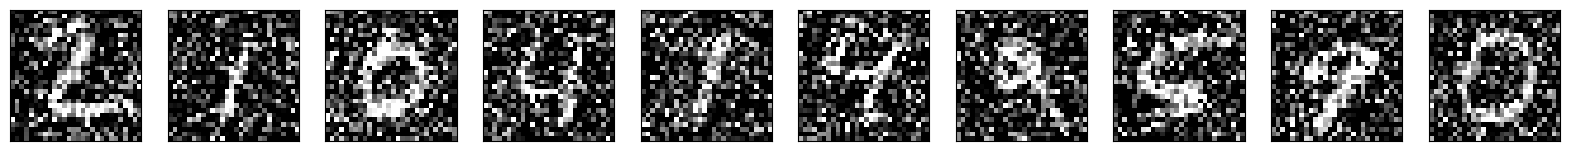

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
enc_input = keras.Input(shape =(28,28,1))
x = layers.Conv2D(32,(3,3),activation = 'relu',padding = 'same')(enc_input)
x = layers.MaxPool2D((2,2),padding = 'same')(x)
x = layers.Conv2D(32,(3,3),activation = 'relu',padding='same')(x)
x = layers.MaxPool2D((2,2),padding ='same')(x)
encoder = keras.Model(enc_input,x)

In [ ]:
dec_input = keras.Input((7,7,32))
x = layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu')(dec_input)
x = layers.UpSampling2D(size = (2,2))(x)
x = layers.Conv2D(32,(3,3),padding ='same',activation = 'relu')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(1,(3,3),activation = 'sigmoid',padding ='same')(x)
decoder = keras.Model(dec_input,x)

In [ ]:
model = keras.Sequential([encoder,decoder])
model.compile(optimizer = 'adam',loss='binary_crossentropy')


In [ ]:
model.fit(x_train_noise,x_train,
          batch_size = 80,
          epochs = 15,
          validation_data = (x_test_noise,x_test),
          shuffle = True)

Epoch 1/15
750/750 [==============================] - 15s 6ms/step - loss: 0.1489 - val_loss: 0.1096
Epoch 2/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1072 - val_loss: 0.1034
Epoch 3/15
750/750 [==============================] - 4s 6ms/step - loss: 0.1030 - val_loss: 0.1006
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1009 - val_loss: 0.0995
Epoch 5/15
750/750 [==============================] - 4s 5ms/step - loss: 0.0997 - val_loss: 0.0982
Epoch 6/15
750/750 [==============================] - 7s 10ms/step - loss: 0.0987 - val_loss: 0.0975
Epoch 7/15
750/750 [==============================] - 4s 5ms/step - loss: 0.0980 - val_loss: 0.0970
Epoch 8/15
750/750 [==============================] - 4s 5ms/step - loss: 0.0974 - val_loss: 0.0967
Epoch 9/15
750/750 [==============================] - 4s 6ms/step - loss: 0.0970 - val_loss: 0.0962
Epoch 10/15
750/750 [==============================] - 4s 5ms/step - loss: 0.0967 - val_loss: 0.09

In [ ]:
decoded_img = model.predict(x_test_noise)

313/313 [==============================] - 1s 2ms/step


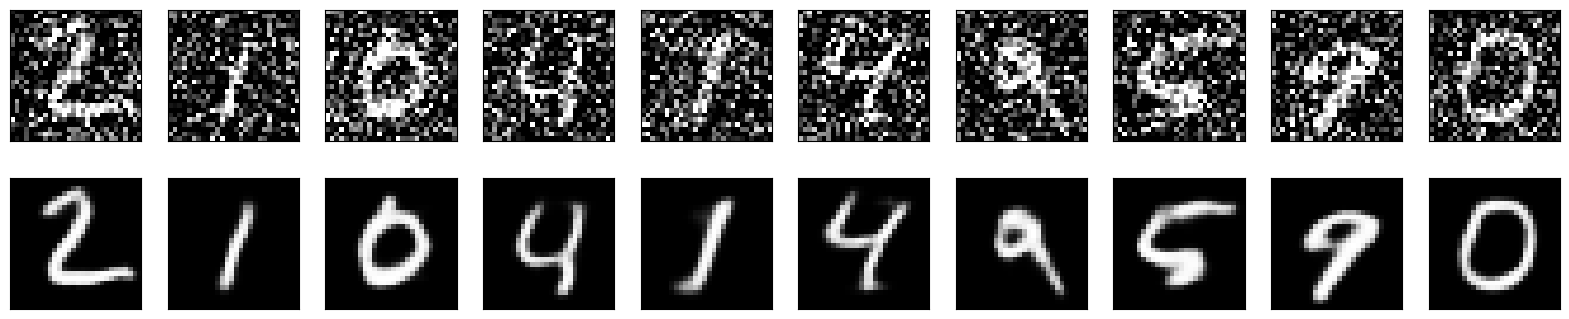

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()